# Modelo Final

## 0. Previos

Se cargan las bases y las librerías a utilizar.

In [1]:
# Librerías

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels
from scipy import stats
from pingouin import pairwise_ttests #this is for performing the pairwise tests
import pydotplus

from io import StringIO
from IPython.display import Image, SVG
from graphviz import Source
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch


from scipy.stats import chi2_contingency, norm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold, train_test_split
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.model_selection import GridSearchCV

from sympy import var, plot_implicit, Eq


#import generic_funcions as gf
#import adherence_functions as af
import warnings
warnings.filterwarnings('ignore')



In [2]:
ruta_archivos = 'C:/Users/Usuario/Documents/Logit_Omnivida/'
print(ruta_archivos)

C:/Users/Usuario/Documents/Logit_Omnivida/


## 1. Variables Dataframe

In [3]:
base = pd.read_csv( ruta_archivos + 'base_adeherencia_features_3.csv', sep='|' )

In [4]:
base.columns

Index(['id', 'year', 'month', 'adeherencia_12', 'cantidad', 'key',
       'far_rea_asma_sum_6', 'far_rea_total_sum_6', 'far_evo_aun_sum_6',
       'far_cau_def_sum_6',
       ...
       'hab_ejercicio_avg_12', 'inc_con_sum_6', 'inc_inc_sum_6',
       'inc_con_sum_12', 'inc_inc_sum_12', 'imc_avg_6', 'imc_avg_12',
       'imc_foto', 'adh_sum_6', 'adh_sum_12'],
      dtype='object', length=142)

In [5]:
print(base.shape)

base['adeherencia_12'] = (base['adeherencia_12']/base['cantidad']).apply(lambda x: 1 if x>=0.5 else 0)
#base['adeherencia_12'] = base['adeherencia_12'].apply(lambda x: 1 if x>=1 else x)

ids = ['id','year','month','adeherencia_12']
base.head()

(3717, 142)


,id,year,month,adeherencia_12,cantidad,key,far_rea_asma_sum_6,far_rea_total_sum_6,far_evo_aun_sum_6,far_cau_def_sum_6,...,hab_ejercicio_avg_12,inc_con_sum_6,inc_inc_sum_6,inc_con_sum_12,inc_inc_sum_12,imc_avg_6,imc_avg_12,imc_foto,adh_sum_6,adh_sum_12
0,500547,2016,7,0,1.0,1,NaN,NaN,NaN,NaN,...,NaN,0.0,3.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN
1,500547,2019,3,0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,500547,2019,10,0,5.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,NaN,0.0
3,500547,2019,12,0,4.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0
4,500547,2020,1,0,3.0,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.8,NaN,0.0,0.0


In [6]:
# Using variables vector of 'Mostrar' analysis.
vec2 = ['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6', 'anf_j_sum_12', 'acd_uso_inhal_avg_12', 'epo_4_sum_6', 'bio_omalizumab_avg_6', 'urg_j_total_sum_12', 'cal_psi_avg_12', 'med_num_dis_avg_12', 'far_des_no_flag', 'far_rea_total_sum_6', 'far_cau_def_sum_12', 'inc_inc_sum_12', 'med_flag_j_avg_12', 'adh_sum_6']
print(len(vec2))
vec2

15


['bio_benralizumab_avg_12',
 'med_num_doses_otra_avg_6',
 'anf_j_sum_12',
 'acd_uso_inhal_avg_12',
 'epo_4_sum_6',
 'bio_omalizumab_avg_6',
 'urg_j_total_sum_12',
 'cal_psi_avg_12',
 'med_num_dis_avg_12',
 'far_des_no_flag',
 'far_rea_total_sum_6',
 'far_cau_def_sum_12',
 'inc_inc_sum_12',
 'med_flag_j_avg_12',
 'adh_sum_6']

In [7]:
def preprocesar( base, ids, ruta_archivos ):
    
    # Variables 
    vec2 = ['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6', 'anf_j_sum_12', 'acd_uso_inhal_avg_12', 'epo_4_sum_6', 'bio_omalizumab_avg_6', 'urg_j_total_sum_12', 'cal_psi_avg_12', 'med_num_dis_avg_12', 'far_des_no_flag', 'far_rea_total_sum_6', 'far_cau_def_sum_12', 'inc_inc_sum_12', 'med_flag_j_avg_12', 'adh_sum_6']
    base_nueva = base[ids + vec2]
    
    # Imputación
    base_nueva.fillna(-1,inplace = True)
    
    # Cruce con datosbasicos
    datosbasicos = pd.read_csv( ruta_archivos + 'DatosBasicos.csv', sep='|' )
    datosbasicos.drop_duplicates( inplace = True )
    Agregada = base_nueva.merge(datosbasicos, on="id", how ='inner')
    
    Agregada.dropna( inplace = True )
    
    # Procesamiento variables
    Agregada['edad'] = round((Agregada['year'] - Agregada['year_n']) + (Agregada['month'] - Agregada['month_n'])/12,0)
    Agregada.drop(columns=['Unnamed: 0', 'fecha_n', 'year_n', 'month_n'], inplace= True)
    
    
    ### Variables categoricas
    categorias = ['genero', 'zona', 'ciudad']
    
    for var in categorias:
        Agregada[var] = Agregada[var].astype('category')
        Agregada[var]=Agregada[var].cat.codes
    
    # Escolaridad
    letras = ['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', 'SECUNDARIA', 'TECNICO', 'TECNOLOGO', 'UNIVERSITARIO', 'POSGRADO']
    valor = [0,1,2,3,4,5,6,7]
    Agregada.replace(letras, valor,inplace = True)
    
    # Estado civil
    letras = ['SOLTERO (A)', 'UNIÓN LIBRE', 'CASADO (A)', 'SEPARADO (A)', 'VIUDO (A)']
    valor = [0,1,2,3,4]
    Agregada.replace(letras, valor,inplace = True)
    
    # Nivel socioeconomico
    letras = ['NIVEL 0 DEL SISBEN', 'NIVEL 1 DEL SISBEN', 'NIVEL 2 DEL SISBEN', 'A', 'B', 'C']
    valor = [0,1,2,3,4,5]
    Agregada.replace(letras, valor,inplace = True)
    
    # Ocupacion
    letras = ['SIN DEFINIR', 'ESTUDIANTE', 'DESEMPLEADO', 'AMA DE CASA', 'INDEPENDIENTE', 'EMPLEADO', 'JUBILADO', 'PENSIONADO']
    valor = [0,1,2,3,4,5,6,7]
    Agregada.replace(letras, valor,inplace = True)
    
    Agregada = Agregada.drop('departamento', axis=1 )
        
    return Agregada

In [8]:
df_t = preprocesar( base, ['id', 'year', 'month', 'adeherencia_12'], ruta_archivos )

In [9]:
df_t.head()

,id,year,month,adeherencia_12,bio_benralizumab_avg_12,med_num_doses_otra_avg_6,anf_j_sum_12,acd_uso_inhal_avg_12,epo_4_sum_6,bio_omalizumab_avg_6,...,adh_sum_6,genero,escolaridad,estadocivil,ciudad,estrato,zona,nivelsocioeconomico,ocupacion,edad
0,500547,2016,7,0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.0,...,-1.0,1,3,2,27,3.0,1,3,5,54.0
1,500547,2019,3,0,-1.0,1021.800000,-1.0,-1.0,-1.0,-1.0,...,-1.0,1,3,2,27,3.0,1,3,5,57.0
2,500547,2019,10,0,-1.0,259.200000,-1.0,-1.0,-1.0,3.0,...,-1.0,1,3,2,27,3.0,1,3,5,57.0
3,500547,2019,12,0,-1.0,596.833333,-1.0,-1.0,-1.0,3.0,...,0.0,1,3,2,27,3.0,1,3,5,58.0
4,500547,2020,1,0,-1.0,732.000000,-1.0,-1.0,-1.0,3.0,...,0.0,1,3,2,27,3.0,1,3,5,58.0


## 2. Covariables

In [22]:
covariates=df_t.columns[4:]
covariates


Index(['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6', 'anf_j_sum_12',
       'acd_uso_inhal_avg_12', 'epo_4_sum_6', 'bio_omalizumab_avg_6',
       'urg_j_total_sum_12', 'cal_psi_avg_12', 'med_num_dis_avg_12',
       'far_des_no_flag', 'far_rea_total_sum_6', 'far_cau_def_sum_12',
       'inc_inc_sum_12', 'med_flag_j_avg_12', 'adh_sum_6', 'genero',
       'escolaridad', 'estadocivil', 'ciudad', 'estrato', 'zona',
       'nivelsocioeconomico', 'ocupacion', 'edad'],
      dtype='object')

In [48]:
Significativas = ['bio_benralizumab_avg_12','med_num_doses_otra_avg_6','epo_4_sum_6','bio_omalizumab_avg_6','cal_psi_avg_12','med_num_dis_avg_12','far_rea_total_sum_6','far_cau_def_sum_12','inc_inc_sum_12','med_flag_j_avg_12','adh_sum_6','escolaridad','zona']
Significativas

['bio_benralizumab_avg_12',
 'med_num_doses_otra_avg_6',
 'epo_4_sum_6',
 'bio_omalizumab_avg_6',
 'cal_psi_avg_12',
 'med_num_dis_avg_12',
 'far_rea_total_sum_6',
 'far_cau_def_sum_12',
 'inc_inc_sum_12',
 'med_flag_j_avg_12',
 'adh_sum_6',
 'escolaridad',
 'zona']

In [49]:
X = df_t[Significativas]
X.head()

,bio_benralizumab_avg_12,med_num_doses_otra_avg_6,epo_4_sum_6,bio_omalizumab_avg_6,cal_psi_avg_12,med_num_dis_avg_12,far_rea_total_sum_6,far_cau_def_sum_12,inc_inc_sum_12,med_flag_j_avg_12,adh_sum_6,escolaridad,zona
0,-1.0,-1.000000,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,3.0,-1.000000,-1.0,3,1
1,-1.0,1021.800000,-1.0,-1.0,-1.0,4.444444,-1.0,-1.0,-1.0,0.111111,-1.0,3,1
2,-1.0,259.200000,-1.0,3.0,-1.0,3.272727,-1.0,-1.0,-1.0,0.090909,-1.0,3,1
3,-1.0,596.833333,-1.0,3.0,-1.0,3.636364,-1.0,-1.0,-1.0,0.090909,0.0,3,1
4,-1.0,732.000000,-1.0,3.0,-1.0,3.727273,-1.0,-1.0,-1.0,0.000000,0.0,3,1


## 3. Modelos

In [50]:
X = df_t[Significativas]
y = df_t['adeherencia_12']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### Logistic Regression

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [53]:
X_train.columns

Index(['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6', 'epo_4_sum_6',
       'bio_omalizumab_avg_6', 'cal_psi_avg_12', 'med_num_dis_avg_12',
       'far_rea_total_sum_6', 'far_cau_def_sum_12', 'inc_inc_sum_12',
       'med_flag_j_avg_12', 'adh_sum_6', 'escolaridad', 'zona'],
      dtype='object')

In [54]:
#Coeficientes
logreg.coef_

array([[-0.09096888, -0.00150256, -0.08822074, -0.09690575,  0.00380046,
        -0.13314734, -0.40677709,  0.52016335,  0.16535644,  0.48737605,
         0.11681602,  0.05008977, -0.80540068]])

In [55]:
yl_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


# Estimators
https://www.datacamp.com/community/tutorials/logistic-regression-R

In [43]:
Base2 = pd.concat([X_train, y_train], axis=1)

In [44]:
Base2['Intercept'] = 1
Base2.columns

Index(['bio_benralizumab_avg_12', 'med_num_doses_otra_avg_6', 'epo_4_sum_6',
       'bio_omalizumab_avg_6', 'cal_psi_avg_12', 'med_num_dis_avg_12',
       'far_rea_total_sum_6', 'far_cau_def_sum_12', 'inc_inc_sum_12',
       'med_flag_j_avg_12', 'adh_sum_6', 'escolaridad', 'estadocivil', 'zona',
       'adeherencia_12', 'Intercept'],
      dtype='object')

In [47]:
logit2 = sm.Logit(Base2['adeherencia_12'], Base2[['Intercept','bio_benralizumab_avg_12','med_num_doses_otra_avg_6','epo_4_sum_6','bio_omalizumab_avg_6','cal_psi_avg_12','med_num_dis_avg_12','far_rea_total_sum_6','far_cau_def_sum_12','inc_inc_sum_12','med_flag_j_avg_12','adh_sum_6','escolaridad','zona']])
logit_res2 = logit2.fit()
logit_res2.summary()

Optimization terminated successfully.
         Current function value: 0.498234
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         adeherencia_12   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                           13
Date:                Sat, 25 Jul 2020   Pseudo R-squ.:                 0.08424
Time:                        16:30:28   Log-Likelihood:                -1494.7
converged:                       True   LL-Null:                       -1632.2
Covariance Type:            nonrobust   LLR p-value:                 4.047e-51
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.5714      0.473     -5.434      0.000      -3.499      -1.644
bio_benralizumab_avg_12     -0.9388      0.319     -2.942      0.003      -1.564      -0.313
med_num_doses_otra_avg_6    -0.0010      0.001     -1.979      0.048      -0.002   -9.62e-06
epo_4_sum_6                 -0.7066      0.221     -3.201      0.001      -1.139      -0.274
bio_omalizumab_avg_6        -0.0652      0.021     -3.061      0.002      -0.107      -0.023
cal_psi_avg_12               0.0075      0.002      3.599      0.000       0.003       0.012
med_num_dis_avg_12          -0.1401      0.072     -1.936      0.053      -0.282       0.002
far_rea_total_sum_6         -0.4366      0.155     -2.808      0.005      -0.741      -0.132
far_cau_def_sum_12           0.5435      0.210      2.588      0.010       0.132       0.955
inc_inc_sum_12               0.1652      0.017      9.942      0.000       0.133       0.198
med_flag_j_avg_12            0.2963      0.115      2.585      0.010       0.072       0.521
adh_sum_6                    0.1218      0.060      2.033      0.042       0.004       0.239
escolaridad                  0.0748      0.032      2.340      0.019       0.012       0.137
zona                        -0.4999      0.208     -2.401      0.016      -0.908      -0.092
============================================================================================
"""

# Model Evaluation using Confusion Matrix
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

In [56]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
from sklearn import metrics
cnf_matrix = confusion_matrix(y_test, yl_pred)
cnf_matrix

array([[559,  14],
       [152,  26]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

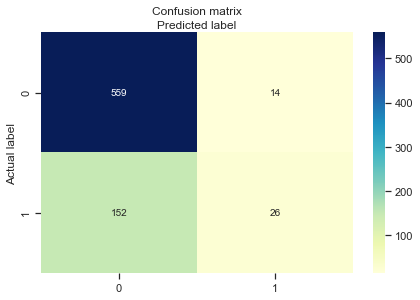

In [58]:
# Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

[[559  14]
 [152  26]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.87       573
           1       0.65      0.15      0.24       178

    accuracy                           0.78       751
   macro avg       0.72      0.56      0.55       751
weighted avg       0.75      0.78      0.72       751



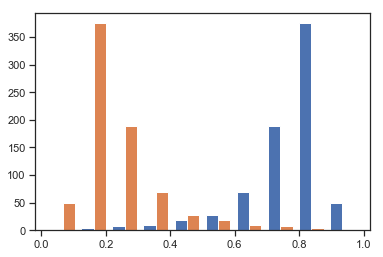

In [59]:
plt.hist(logreg.predict_proba(X_test))
print(confusion_matrix(y_test, yl_pred))
print(classification_report(y_test, yl_pred))

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, yl_pred))
print("Precision:",metrics.precision_score(y_test, yl_pred))
print("Recall:",metrics.recall_score(y_test, yl_pred))

Accuracy: 0.7789613848202397
Precision: 0.65
Recall: 0.14606741573033707


# ROC Curve

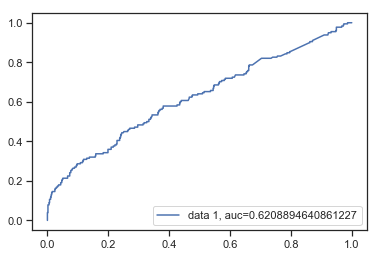

In [62]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Sensitivity and Specificity

In [63]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, yl_pred)
print('Confusion Matrix : \n', cm1)


total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[559  14]
 [152  26]]
Accuracy :  0.7789613848202397
Sensitivity :  0.9755671902268761
Specificity :  0.14606741573033707
